In [1]:
#280420
import numpy as np
import pandas as pd
import sklearn
#import scipy 
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.mixture import GaussianMixture 

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
#from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import classification_report,accuracy_score,silhouette_score,fowlkes_mallows_score, v_measure_score
#from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor
#from sklearn.svm import OneClassSVM
from pylab import rcParams
#from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.utils import resample
from sklearn import metrics

from sklearn import manifold
from sklearn.utils import check_random_state
from sklearn.utils import shuffle
from warnings import simplefilter

rcParams['figure.figsize'] = 14, 8
#RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

#data = pd.read_csv(r'C:\Users\utilisateur\Documents\Master 1\Unsupervised\Unsupervised\creditcard.csv', na_values="?",
                # low_memory=False)


#data.info()

In [2]:

data_init = pd.read_csv(r'C:\Users\user\Projet 2020 Bar Ilan\creditcard.csv', na_values="?",low_memory=False)
#data_init = pd.read_csv(r'C:\Users\utilisateur\Documents\Master 1\Unsupervised\Unsupervised\creditcard.csv', na_values="?",low_memory=False)

#nb of observations
#n = data.shape[0]
#nb of variables
#p = data.shape[1]

#print ( n,p)

In [3]:
#data.head(4)

In [4]:
#data_init.isnull().values.any()

In [5]:
#Time and Amount scalling
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
data = data_init.copy()


std_scaler = StandardScaler()
rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!
print(data.shape)
data.head()

(284807, 31)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


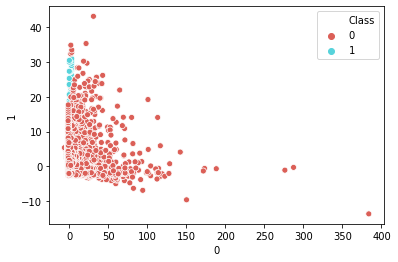

In [6]:
#PCA For ALL Data and ALL features
#במידה והמטרה היא לפרתח מודל פרדיקטיבי יש להיזהר כי לא חולק לTRAIN ןTEST
df_for_pca = data.copy()

del df_for_pca['Class']

pca_model_2Dim = PCA(n_components=2)
pca_data_2Dim = pca_model_2Dim.fit_transform(df_for_pca)

df_pca = pd.DataFrame(pca_data_2Dim)

#print(np.array2string(pca_model.components_,precision=3, suppress_small=True))

df_pca['Class'] = data['Class']
sns.scatterplot(x=0,y=1,hue="Class",data=df_pca,palette =sns.color_palette("hls",2))

In [79]:
print(np.array2string(pca_model_2Dim.components_,precision=3, suppress_small=True))

[[ 0.927 -0.002 -0.141 -0.25  -0.088  0.037 -0.142  0.076  0.127 -0.031
  -0.012 -0.028  0.    -0.002  0.001  0.008 -0.001 -0.001  0.002  0.007
  -0.011  0.063  0.019 -0.011 -0.017  0.001 -0.006 -0.     0.003  0.001]
 [-0.065 -0.04  -0.971  0.199  0.061 -0.017  0.064 -0.033 -0.052  0.013
   0.004  0.01   0.002 -0.     0.    -0.002  0.002  0.    -0.    -0.003
   0.003 -0.019 -0.006  0.003  0.005 -0.     0.002  0.    -0.001 -0.   ]]


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  **kwargs)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


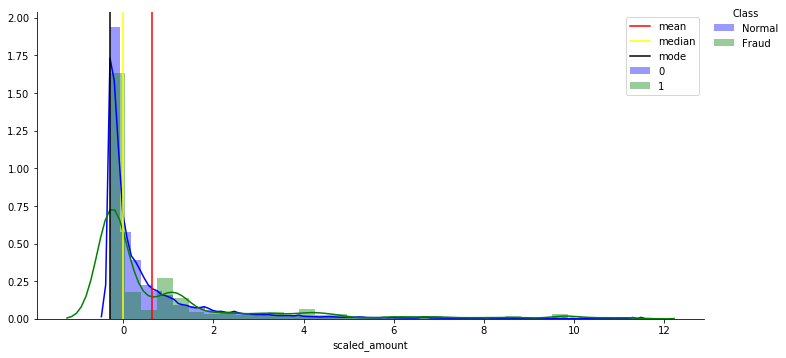

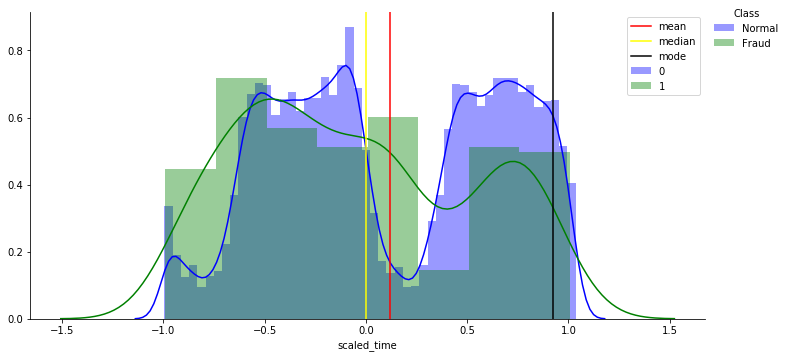

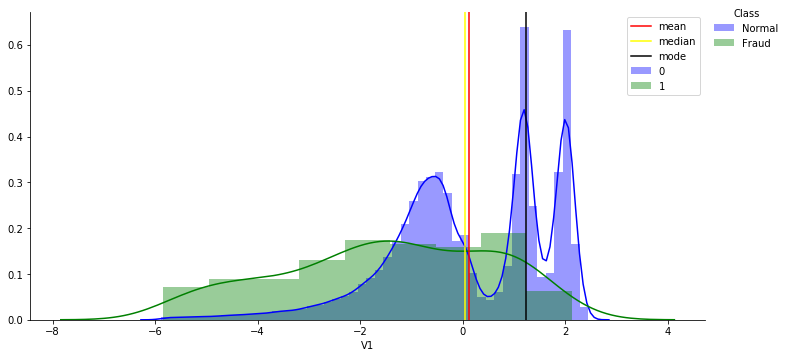

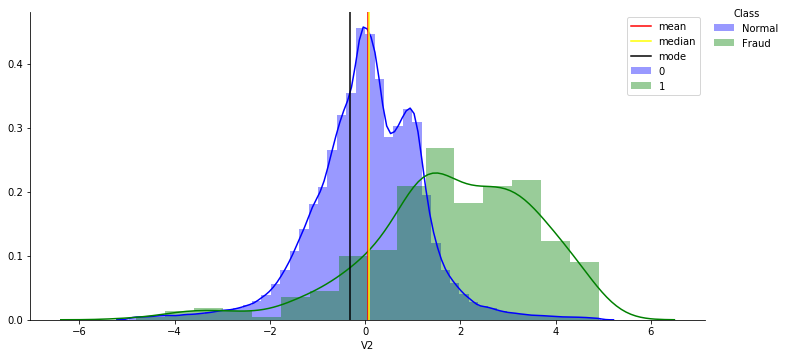

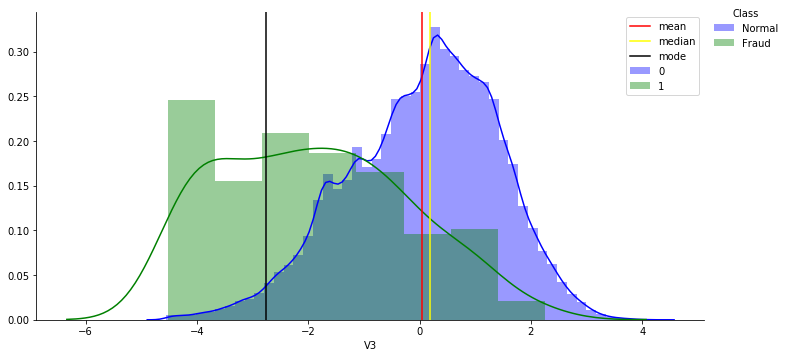

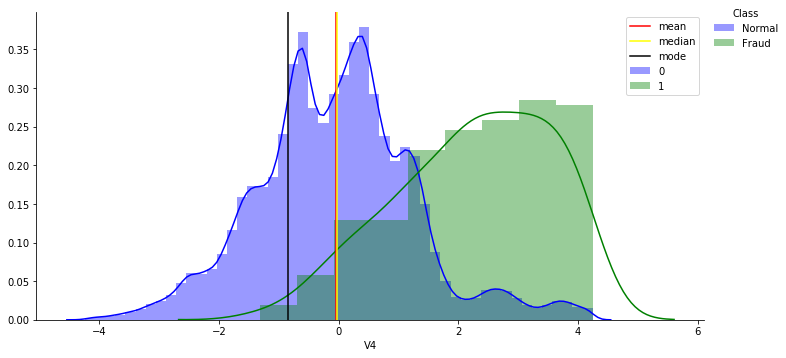

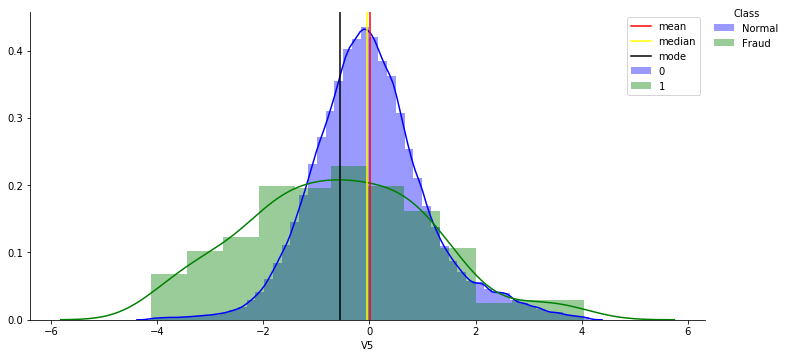

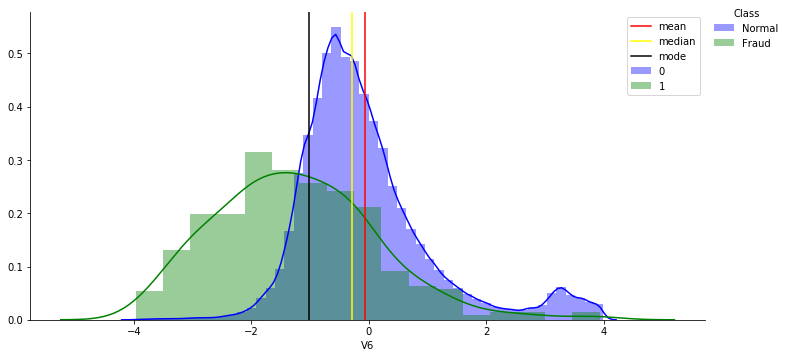

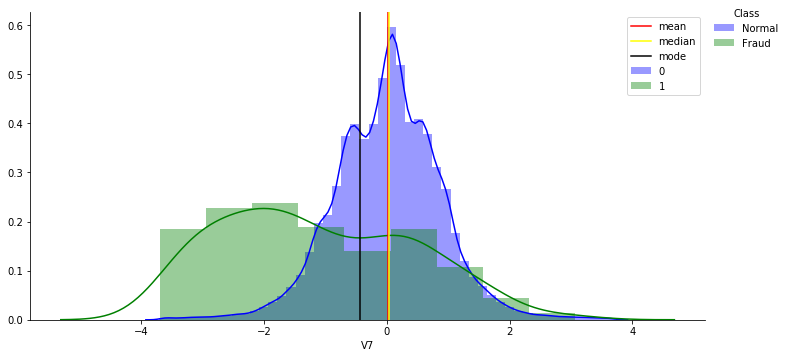

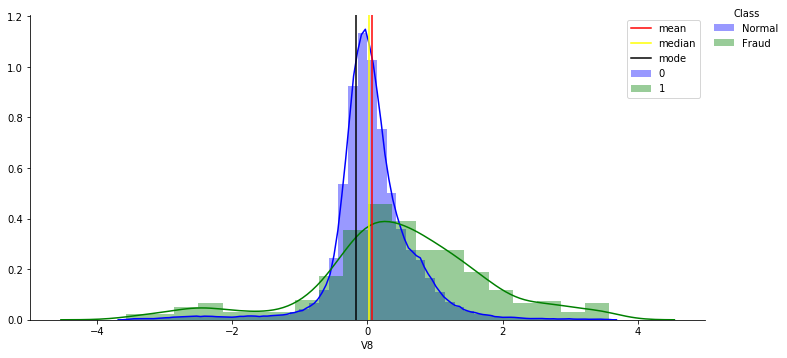

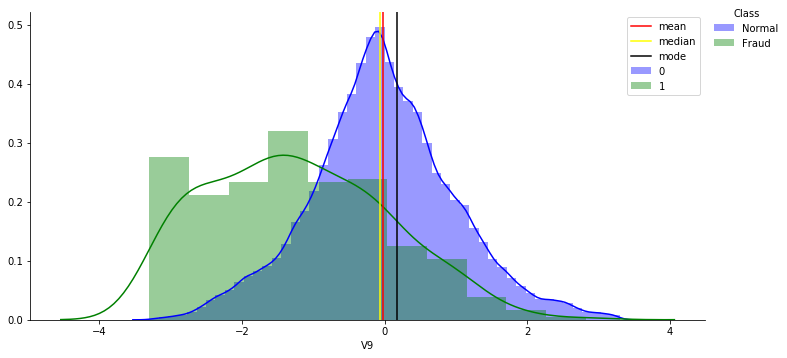

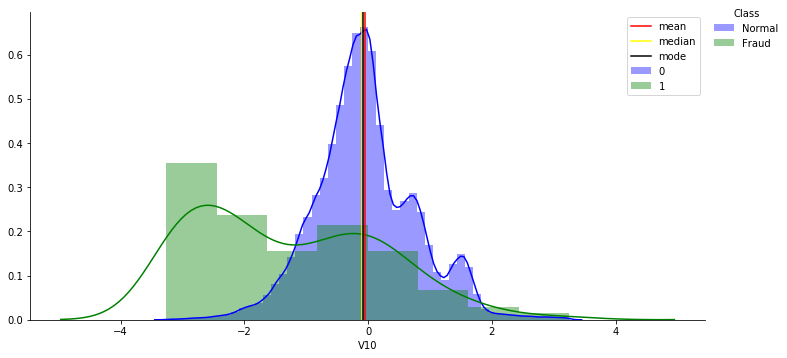

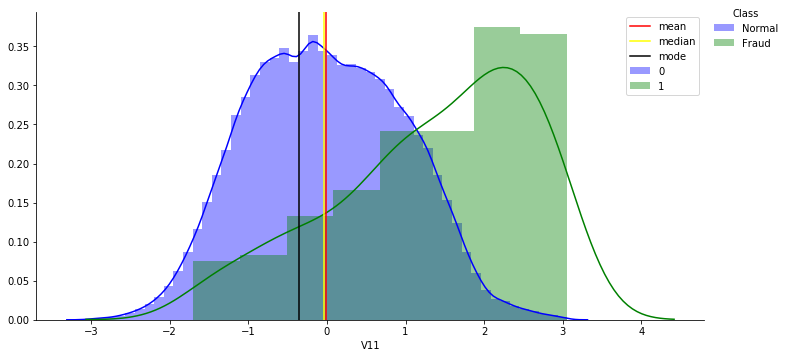

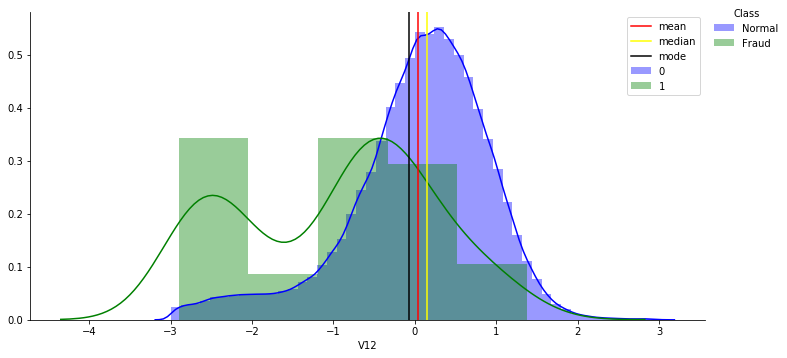

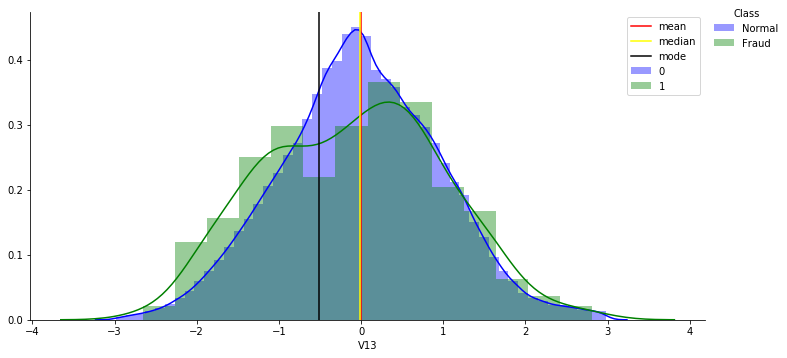

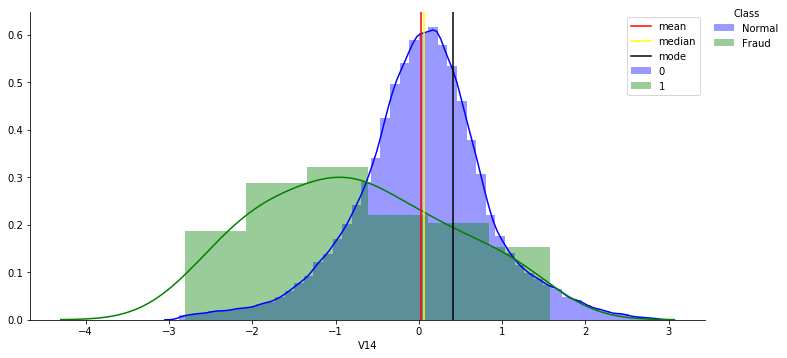

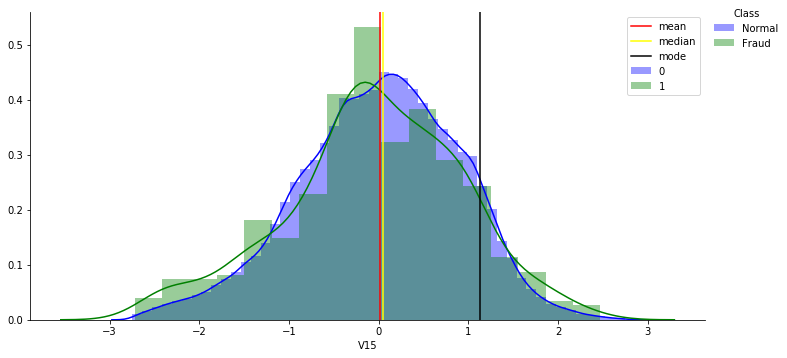

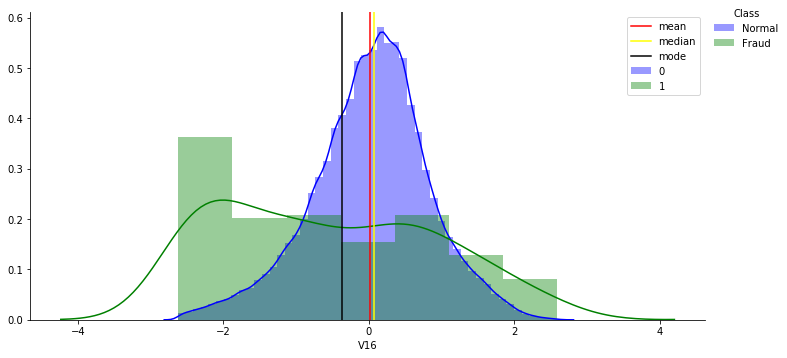

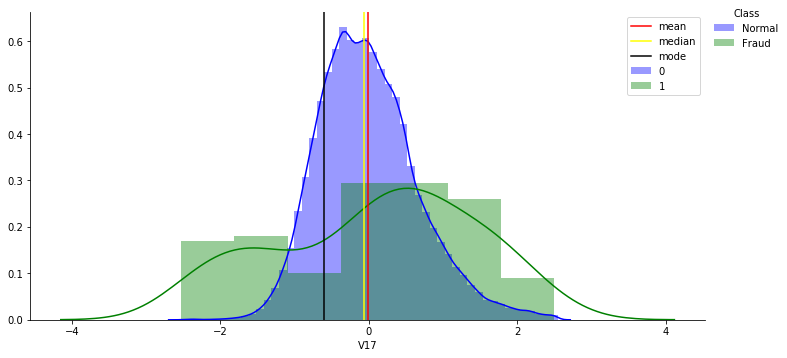

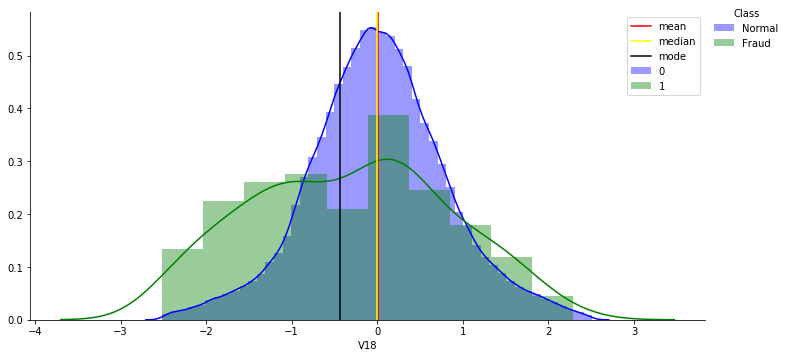

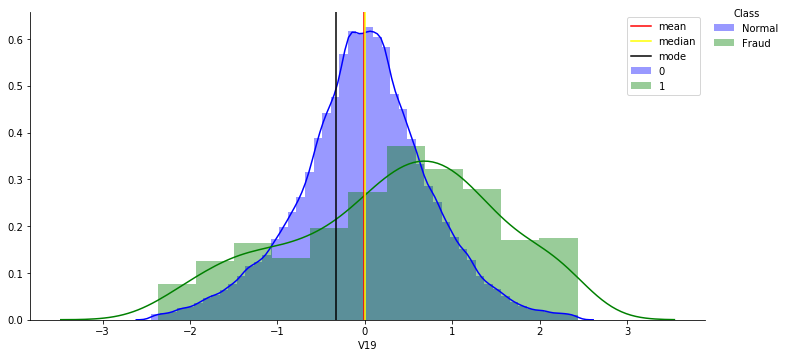

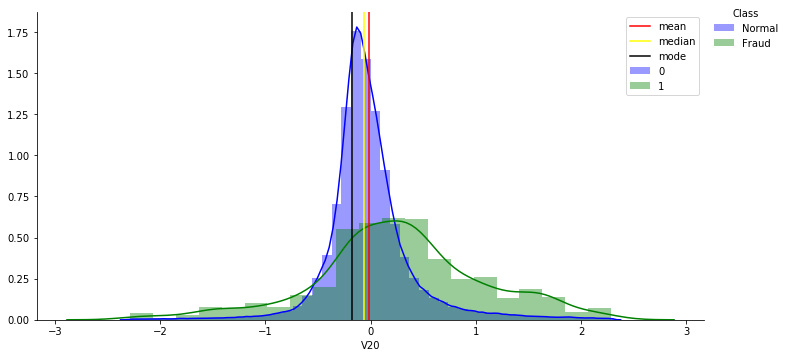

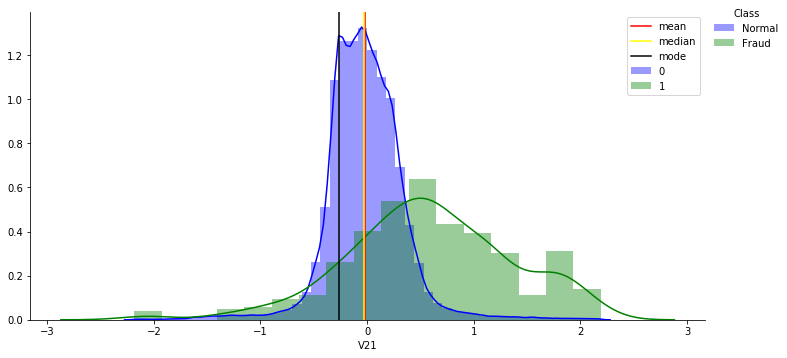

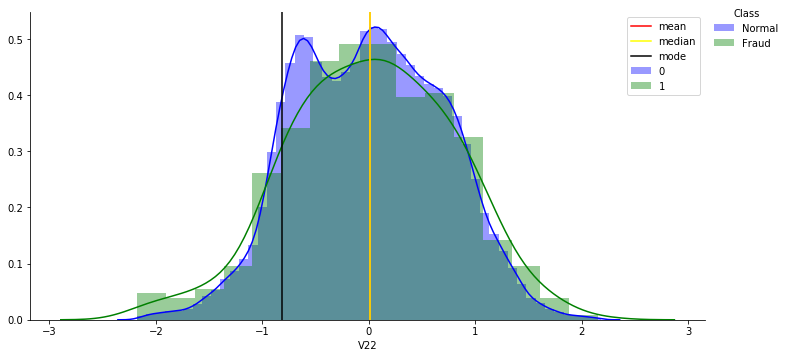

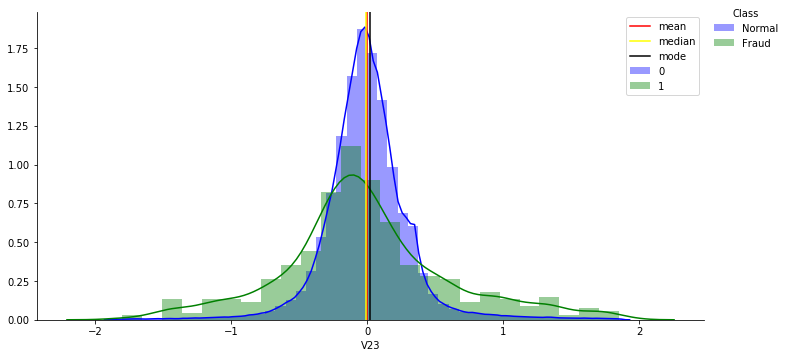

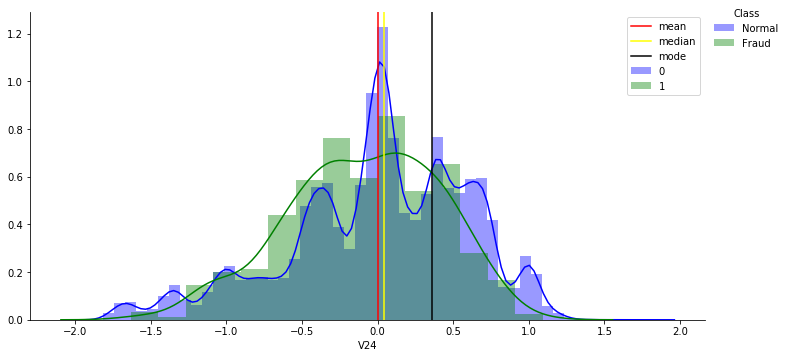

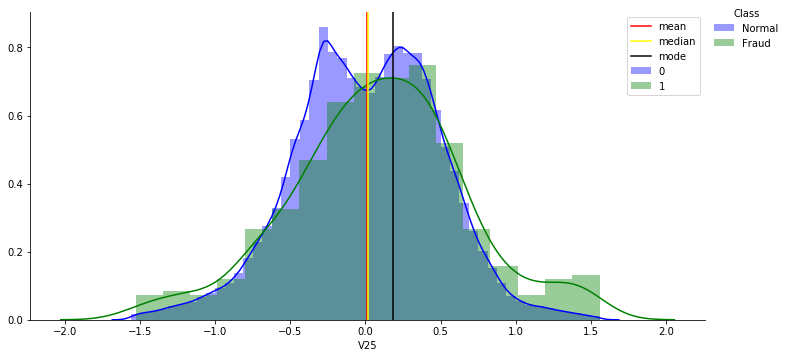

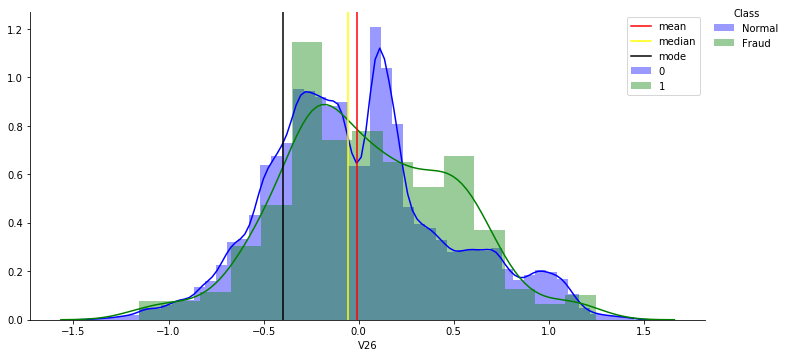

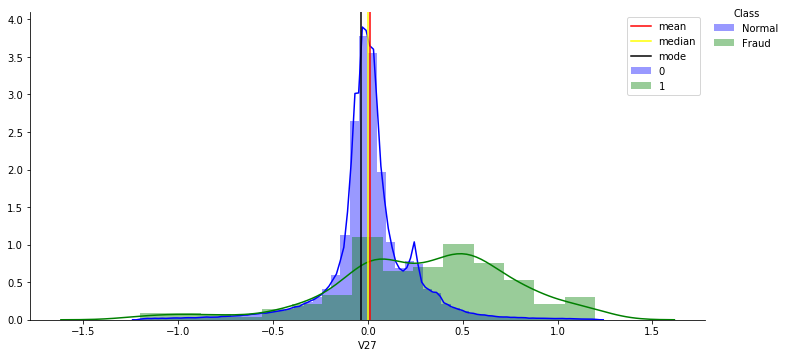

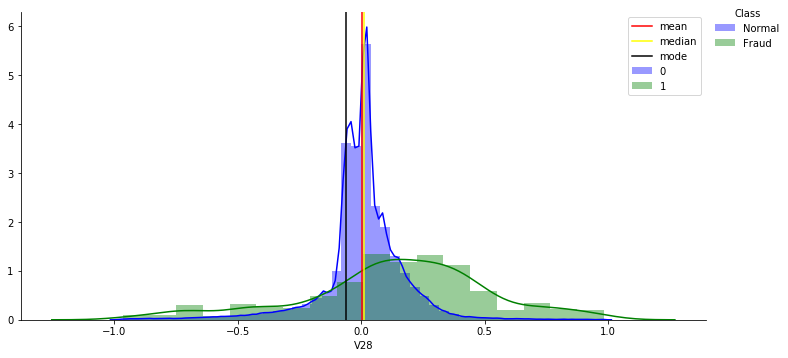

In [7]:
#Graph of variables with statistical description
for c in data.columns[0:30]:
    norm = data[c].mean() + 3*data[c].std()
    data2 = data[data[c].abs() < norm]
    col= data[data[c].abs() < norm][c]
    col=np.array(col)
    col_mean= np.mean(col)
    col_median= np.median(col)
    col_mode= stats.mode(col)[0][0]
    col_std= np.std(col)
    col_var= np.var(col)
    col_range= col.max()-col.min()
    fig=sns.FacetGrid(data2,hue="Class",height=5,aspect=2,palette=["blue", "green"])
    fig.map(sns.distplot,c)
    fig.add_legend(labels=['Normal','Fraud'])
    #plt.yscale('log')
    plt.axvline(col_mean,color='red',label='mean')
    plt.axvline(col_median,color='yellow',label='median')
    plt.axvline(col_mode,color='black',label='mode')
    plt.legend()
    plt.show

In [8]:
#show the histogram better.witno outlier
#sort the value and remove outliers 

df=pd.DataFrame()

for c in data.columns:
    #plt.figure(i)
    if c[0]!= 'V':
        continue
    x = data[c]
    x= x.sort_values()
    x= x[20000:-20000]
    df[c]=x


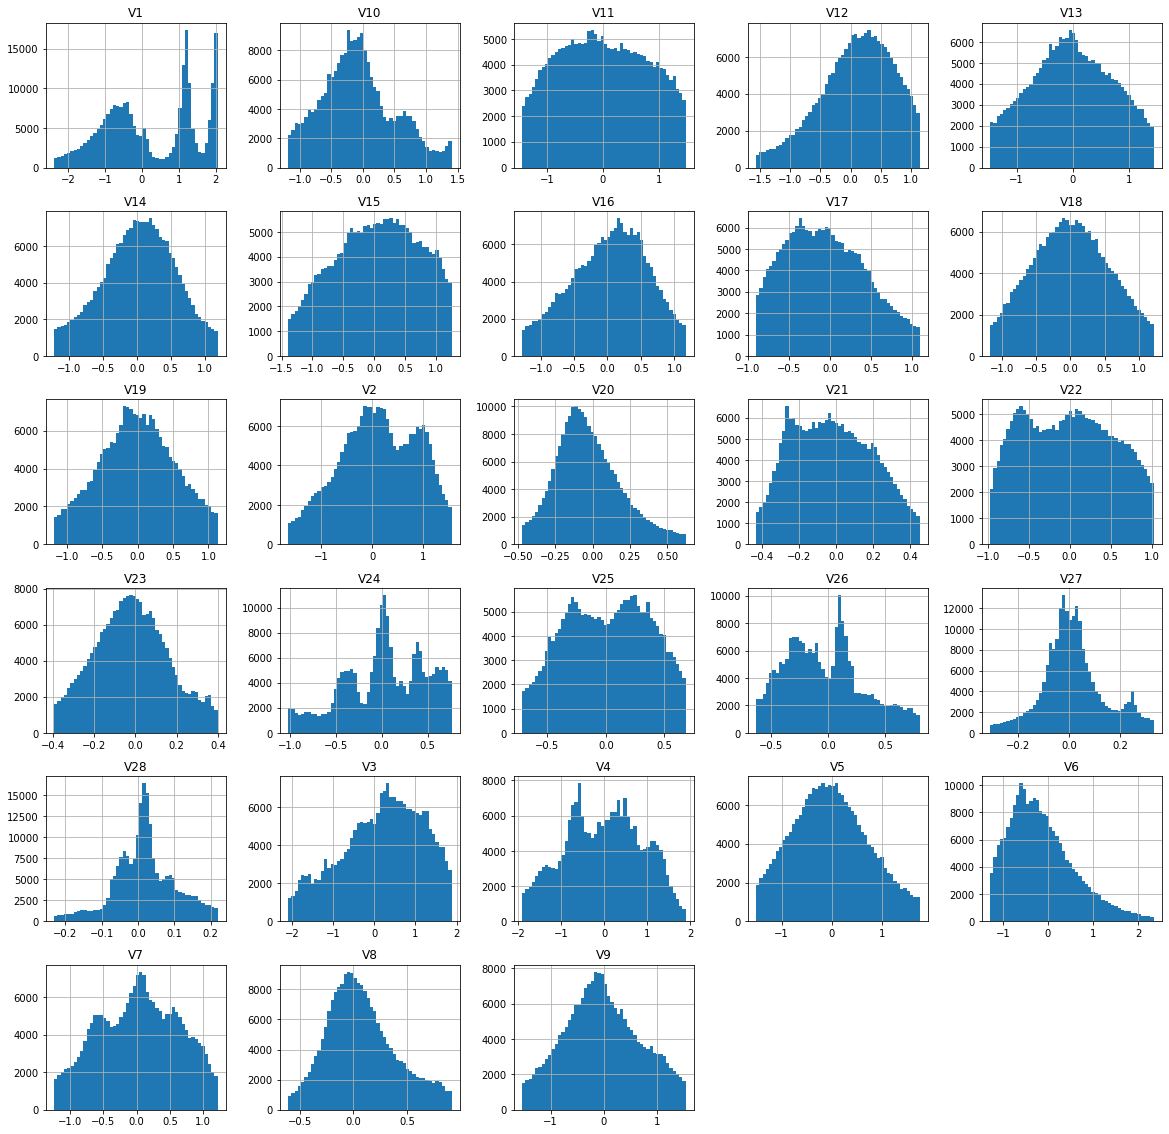

In [9]:
df.hist(bins = 50, figsize = (20,20))
plt.show()

In [10]:
#now we transform the data to Gaussian and delete outliers to see better evry features

In [11]:

dfT = pd.DataFrame()
for c in data.columns:
    #plt.figure(i)
    if c[0]!= 'V':
        continue
    x = data[c]
    x= x.sort_values()
    x= x[20000:-20000]
    #x=sklearn.preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
    X=power_transform(x[:,np.newaxis], method='yeo-johnson', standardize=True, copy=True)

    #print(X.shape)
    dfT[c]=X.squeeze()

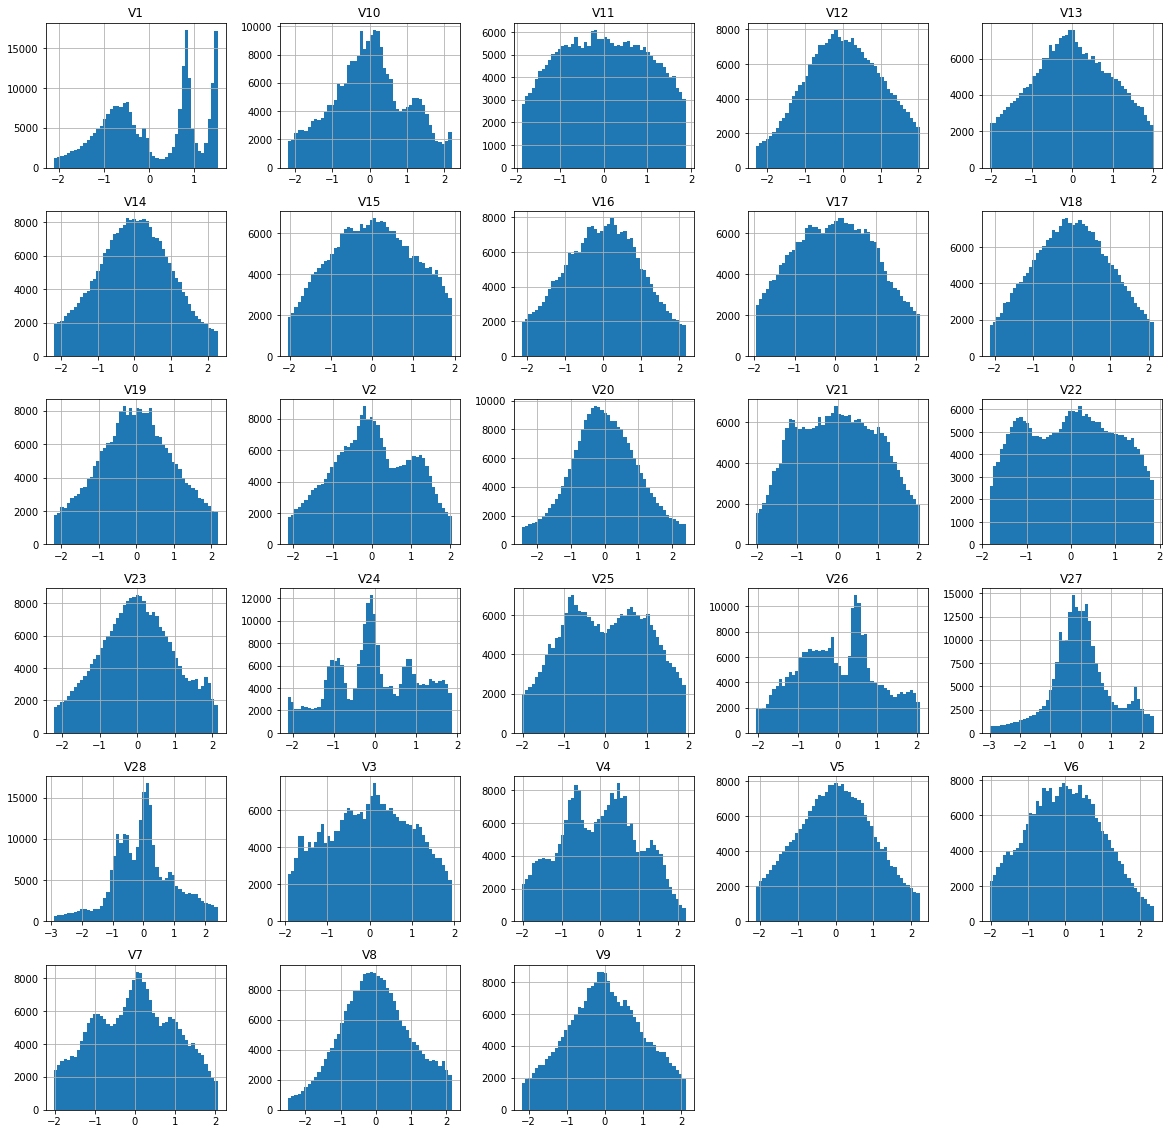

In [12]:
dfT.hist(bins = 50, figsize = (20,20))
plt.show()

In [13]:
#Transform the data for work - no delete outlier
#we use method 'yeo-johnson' because we have negative values
dataT = pd.DataFrame()
for c in data.columns:
    #plt.figure(i)
    if c[0]!= 'V':
        continue
    x = data[c]
    X=power_transform(x[:,np.newaxis], method='yeo-johnson', standardize=True, copy=True)
    dataT[c]=X.squeeze()

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expl

<Figure size 432x288 with 0 Axes>

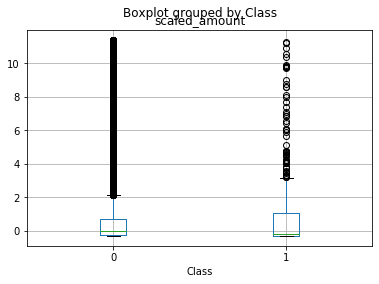

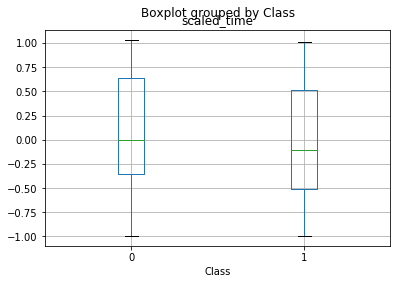

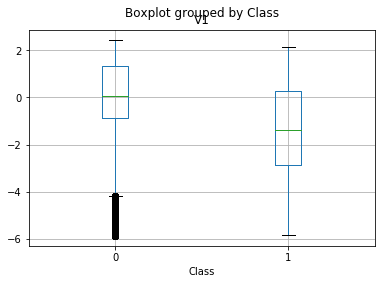

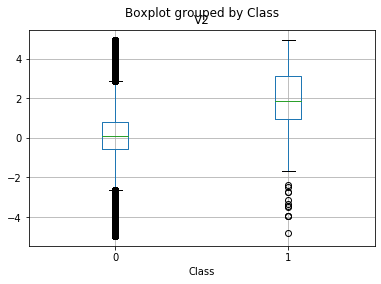

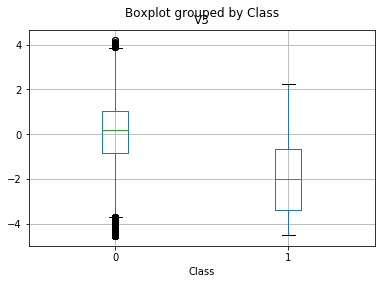

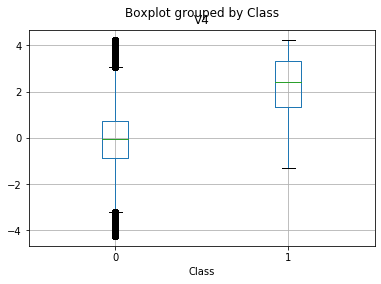

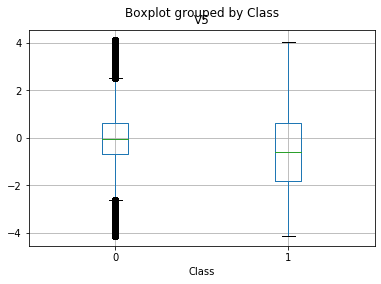

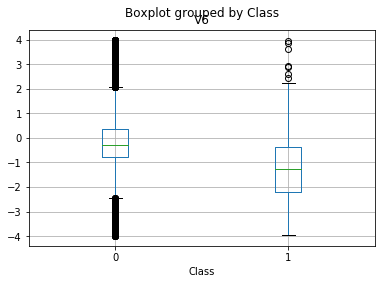

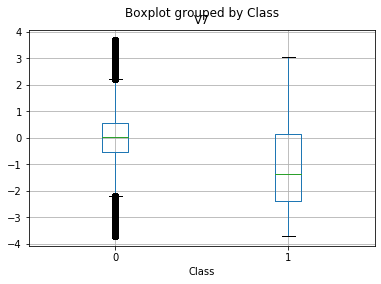

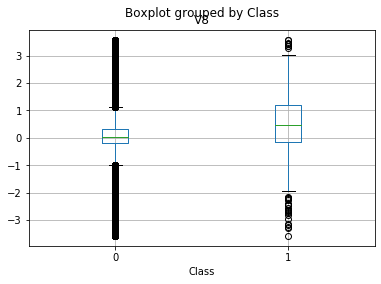

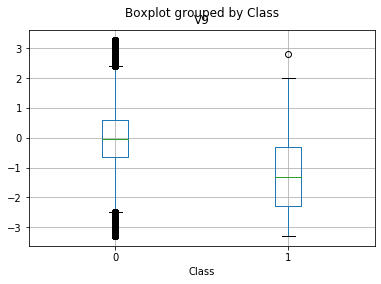

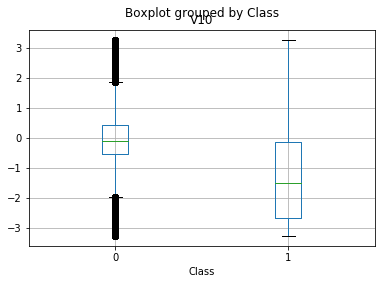

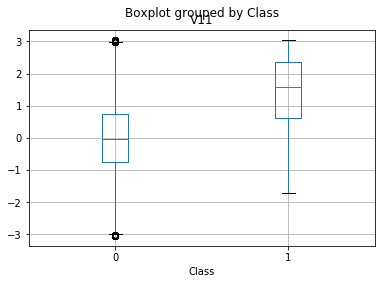

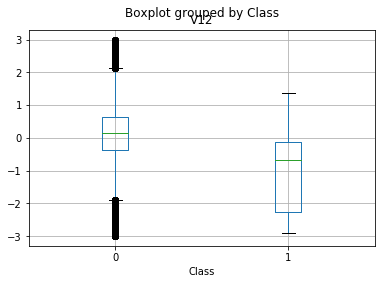

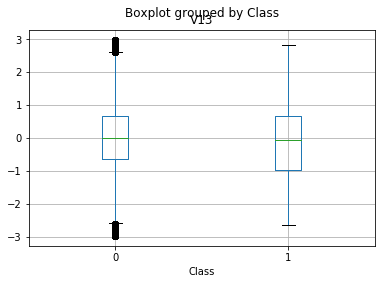

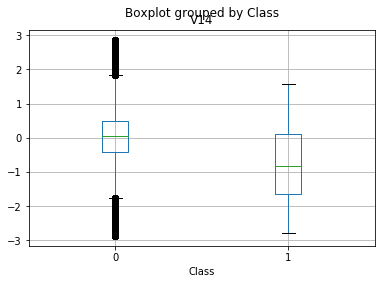

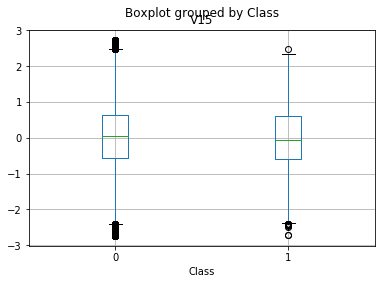

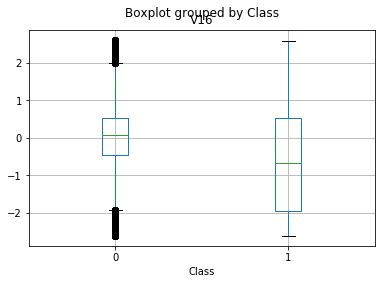

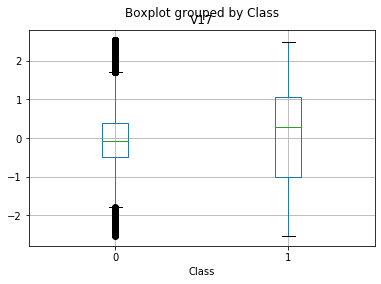

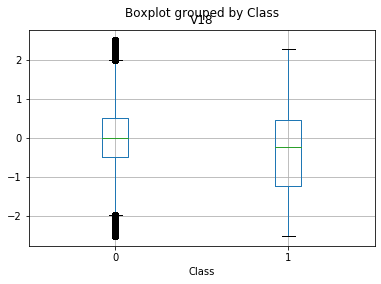

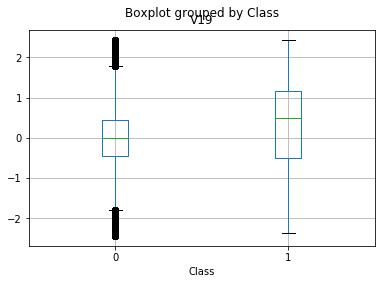

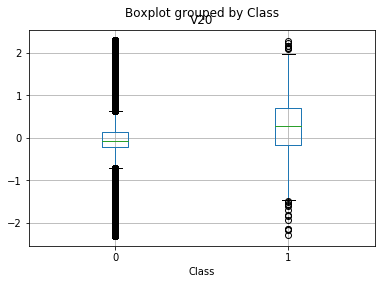

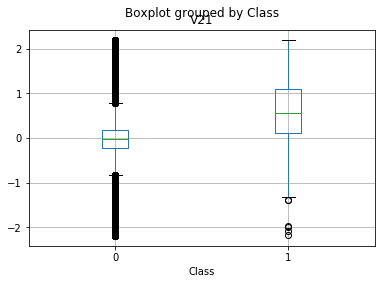

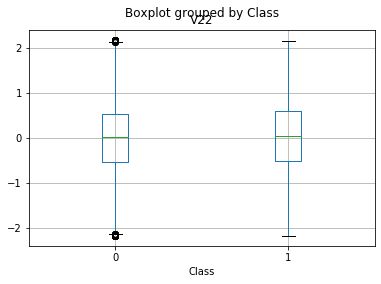

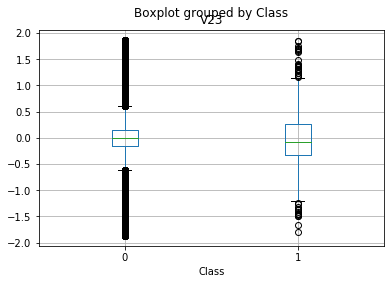

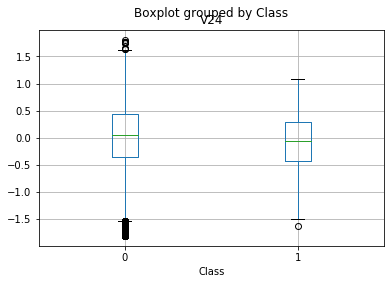

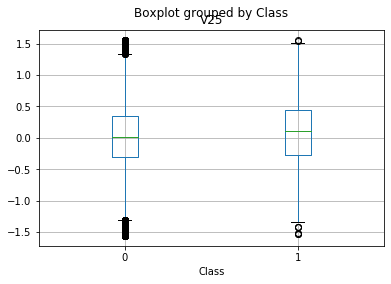

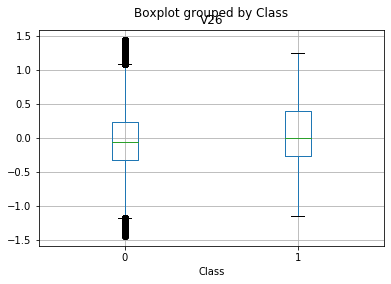

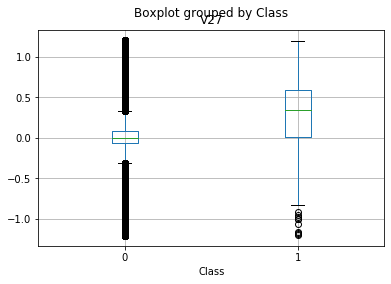

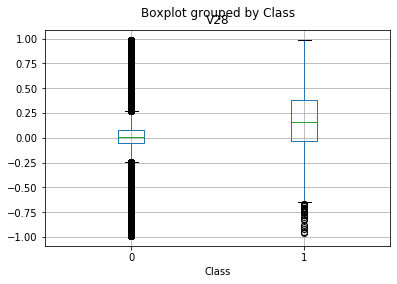

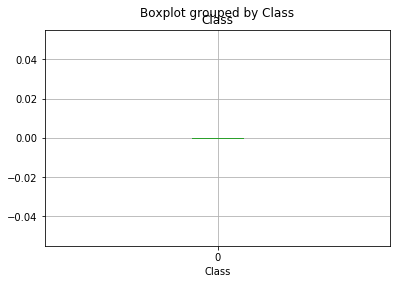

In [14]:
#BoxPlot
i=0
for c in data.columns:
    plt.figure(i)
    norm = data[c].mean() + 3*data[c].std()
    data[data[c].abs() < norm].boxplot([c], 'Class')
    i+=1

Text(0, 0.5, 'Frequency')

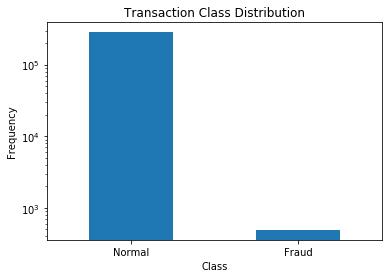

In [15]:

colors = ['#B3F9C5', '#f9c5b3']
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS )
plt.yscale('log')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [16]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]
normal = data[data['Class']==0]

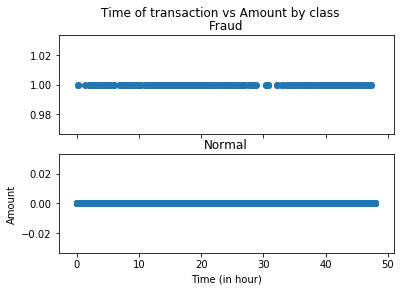

In [17]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.
fraud_init = data_init[data_init['Class']==1]
normal_init = data_init[data_init['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud_init.Time/3600, fraud_init.Class)
ax1.set_title('Fraud')

ax2.scatter(normal_init.Time/3600, normal_init.Class)
ax2.set_title('Normal')
plt.xlabel('Time (in hour)')
plt.ylabel('Amount')
plt.show()

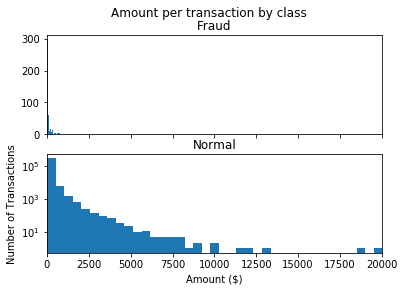

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud_init.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal_init.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

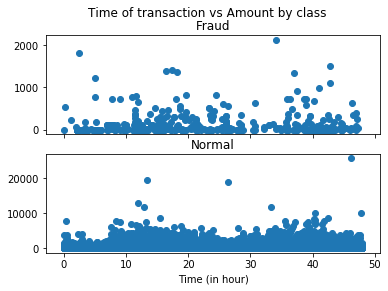

In [19]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud_init.Time/3600, fraud_init.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal_init.Time/3600, normal_init.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in hour)')
#plt.ylabel('Amount')covMatrix = np.cov(Data,bias=True)
#print (covMatrix)
plt.show()

In [20]:
fraud.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,1.400284,-0.046349,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,1.0
std,3.586715,0.561982,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,...,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,0.0
min,-0.307413,-0.990214,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,1.0
25%,-0.293440,-0.510468,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,...,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.0
50%,-0.178160,-0.107185,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,...,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,1.0
75%,1.172221,0.514468,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,...,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,1.0
max,29.398030,1.006309,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,1.0


In [21]:
normal.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,0.926305,0.119200,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,0.0
std,3.494796,0.557854,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,...,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,0.0
min,-0.307413,-0.994983,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0
25%,-0.228464,-0.357875,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,...,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,0.0
50%,0.000000,0.000223,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,...,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,0.0
75%,0.769231,0.641937,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,...,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,0.0
max,358.683155,1.035022,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,0.0


               scaled_amount  scaled_time            V1            V2  \
scaled_amount       1.000000    -0.010596 -2.277087e-01 -5.314089e-01   
scaled_time        -0.010596     1.000000  1.173963e-01 -1.059333e-02   
V1                 -0.227709     0.117396  1.000000e+00  4.697350e-17   
V2                 -0.531409    -0.010593  4.697350e-17  1.000000e+00   
V3                 -0.210880    -0.419618 -1.424390e-15  2.512175e-16   
V4                  0.098732    -0.105260  1.755316e-17 -1.126388e-16   
V5                 -0.386356     0.173072  6.391162e-17 -2.039868e-16   
V6                  0.215981    -0.063016  2.398071e-16  5.024680e-16   
V7                  0.397311     0.084714  1.991550e-15  3.966486e-16   
V8                 -0.103079    -0.036949 -9.490675e-17 -4.413984e-17   
V9                 -0.044246    -0.008660  2.169581e-16 -5.728718e-17   
V10                -0.101502     0.030617  7.433820e-17 -4.782388e-16   
V11                 0.000104    -0.247689  2.438580

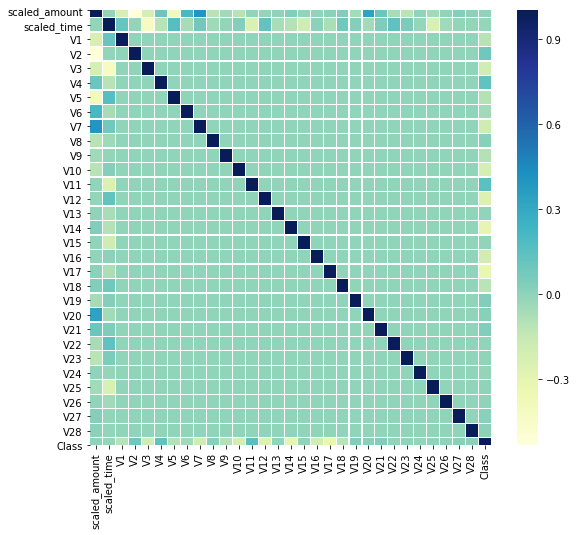

In [22]:
#get correlations of each features in dataset
corrmat = data.corr()

print(corrmat)

  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

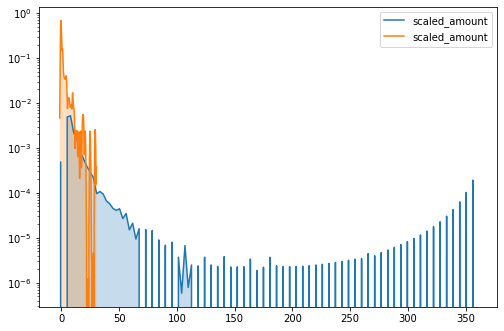

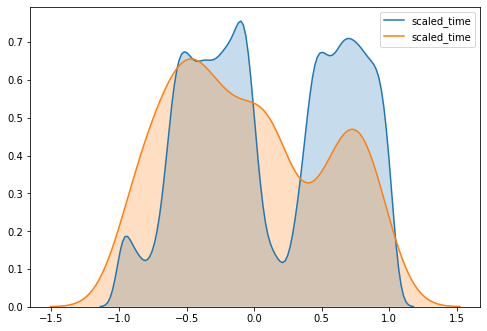

In [23]:
plt.figure(figsize=(20,50))
plt.subplot(11,3,1)
sns.kdeplot(normal['scaled_amount'], shade= True)
sns.kdeplot(fraud['scaled_amount'], shade= True)
plt.tight_layout()
plt.yscale('log')
plt.show()

plt.figure(figsize=(20,50))
plt.subplot(11,3,2)
sns.kdeplot(normal['scaled_time'], shade= True)
sns.kdeplot(fraud['scaled_time'], shade= True)
plt.tight_layout()
plt.show()
   


we can see that some feature are distributed the same for fraud and normal so we won't take them for the analyze

we choose features: 'V1','V2','V3','V4','V5','V7','V9','V10','V11','V12','V14','V16','V17','V18'

In [24]:
#הדטה ממש גדול ולכן ניקח חלק בשביל העבודה
## Take some sample of the data
data_transform=pd.DataFrame()
data_transform = dataT.copy()

data_transform['scaled_time'] = data['scaled_time']
data_transform['scaled_amount'] = data['scaled_amount']
data_transform['Class'] = data['Class']
#data_transform.head()



In [25]:

data_transform_reduce=pd.DataFrame()
#reduce  the data
#take for few iteration sample of 5000 normal and all the fraud
fraud1 = data_transform[data_transform['Class'] ==1]
normal1 = data_transform[data_transform['Class'] ==0]#[:round(len(data_transform)/2)]

data_normal_sampled = resample(normal1,
                              n_samples=5000,
                              random_state=None)
#data_transform[data_transform['Class'] ==0][:round(len(data_transform)/2)]
data_transform_reduce = pd.concat([fraud1, data_normal_sampled], axis=0).sample(frac=1).reset_index(drop=True)
print(data_transform_reduce.Class.value_counts())


print(fraud1.shape,data_normal_sampled.shape)
outlier_fraction = len(fraud1)/float(len(data_normal_sampled))
print(outlier_fraction)

0    5000
1     492
Name: Class, dtype: int64
(492, 31) (5000, 31)
0.0984


In [26]:
#features = data_transform_reduce


In [27]:
#Sample of the data
X = data_transform_reduce[['V1','V2','V3','V4','V5','V7','V9','V10','V11','V12','V14','V16','V17','V18','scaled_time']]
y = data_transform_reduce['Class']
#print(X.shape)
#print(y.shape)


In [28]:
#X.head()

In [29]:
#All the data
X_all_data = data_transform[['V1','V2','V3','V4','V5','V7','V9','V10','V11','V12','V14','V16','V17','V18','scaled_time']]
y_all_data = data_transform['Class']

#print(X_all_data.shape)
#print(y_all_data.shape)

general function

In [30]:
def plot_3d_scatter(data,labels):
    #plt.subplot(1,2,1)
    fig1 = plt.figure()
    ax1 = Axes3D(fig1)
    ax1.scatter(data[:,1], data[:,0], data[:,2],c=labels)
    #plt.subplot(1,2,2)
    fig2 = plt.figure()
    ax2 = Axes3D(fig2)
    ax2.scatter(data[:,0], data[:,1], data[:,2],c=labels)

    plt.show()

In [31]:
def print_silouhette_score(data,model_label):
    print("silhouette score : %0.3f" %  silhouette_score(data,model_label))

In [32]:
def compute_mutual_info_p_value(true_label,model_label):
    simplefilter(action='ignore', category=FutureWarning)
    # ignore all future warnings
    simplefilter(action='ignore', category=FutureWarning)
    p = 1000
    vec = []
    real_score = normalized_mutual_info_score(true_label,model_label)
    #print(real_score, "real score")
    for i in range(p):
        y_shuffle = shuffle(true_label).reset_index()
        y_shuffle = y_shuffle.drop('index', axis=1)
        #print(y_shuffle)
        y_shuffle = y_shuffle.squeeze()
        #dummy_score = normalized_mutual_info_score(y_shuffle, Kmean_cluster)
        dummy_score = normalized_mutual_info_score(y_shuffle, model_label)
        #if dummy_score > homo_score:
           # print(high)
        vec.append(dummy_score)
  
    p_value_s = np.array(vec)
    #vec = []
   
    print('p value for normalized mutual info- ',len(p_value_s[p_value_s > real_score]) / float(1000))
    sns.distplot(p_value_s, axlabel="normalized mutual info")


In [33]:
def print_clustering_score(true_label,model_cluster):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_label,model_cluster))
    print("Completeness: %0.3f" % metrics.completeness_score(true_label,model_cluster))
    print("V-measure: %0.3f" % metrics.v_measure_score(true_label,model_cluster))
    print("normalized mutual info: %0.3f" % normalized_mutual_info_score(true_label,model_cluster))
    compute_mutual_info_p_value(true_label, model_cluster)

PCA

In [34]:

pca_model_3 = PCA(n_components=3)
pca_3_data_sample = pca_model_3.fit_transform(X)

pca_model_2 = PCA(n_components=2)
pca_2_data_sample = pca_model_2.fit_transform(X)

pca_2_all_data = pca_model_2.fit_transform(X_all_data)

Clustering

K-mean

In [35]:
#def find_best_num_clusterKMean(data):
elbow_scores = {}
fowlkes_scores = {}
v_measure_scores = {}
silhouette_scores = {} 

for k in range(2,9):
    #print(k)
    kmeans_model = KMeans(n_clusters=k,n_jobs=-1)
    kmeans_model.fit(X)
    Kmean_Pred = kmeans_model.labels_

    elbow_scores.update({k:kmeans_model.inertia_})
    fowlkes_scores_val = fowlkes_mallows_score (y,Kmean_Pred)
    fowlkes_scores.update({k:fowlkes_scores_val})
    v_measure_val = v_measure_score(y,Kmean_Pred)
    v_measure_scores.update({k:v_measure_val})
    silhouette_score_val = silhouette_score(X,kmeans_model.labels_)
    silhouette_scores.update({k:silhouette_score_val})

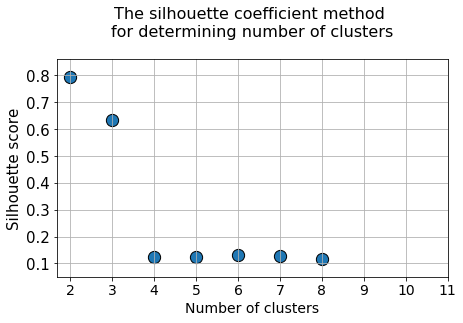

In [36]:
#Sןilouhette score is not so good
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=list(silhouette_scores.keys()),y=list(silhouette_scores.values()),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

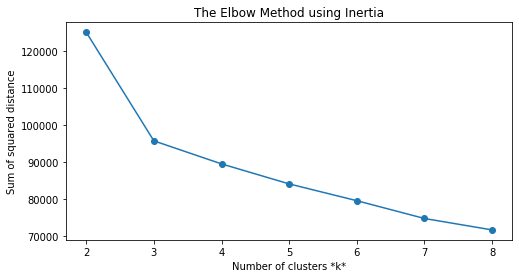

In [37]:
# Plot sse against k
plt.figure(figsize=(8, 4))

plt.title('The Elbow Method using Inertia') 
plt.plot(list(elbow_scores.keys()),list(elbow_scores.values()), '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

[]

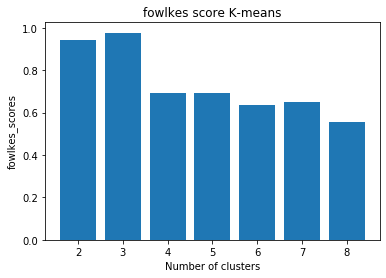

In [38]:
plt.bar(list(fowlkes_scores.keys()),list(fowlkes_scores.values()),align='center')
plt.xlabel("Number of clusters")
plt.ylabel("fowlkes_scores")
plt.title('fowlkes score K-means')
plt.plot()

[]

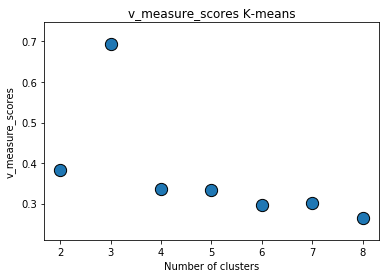

In [39]:
#plt.bar(list(v_measure_scores.keys()),list(v_measure_scores.values()),align='center', alpha=0.5)
plt.scatter(list(v_measure_scores.keys()),list(v_measure_scores.values()),s=150,edgecolor='k')
plt.xlabel("Number of clusters")
plt.ylabel("v_measure_scores")
plt.title('v_measure_scores K-means')
plt.plot()

# KMEAN MODEL

Class,0,1
Cluster,,
0,4999,103
1,0,114
2,1,275


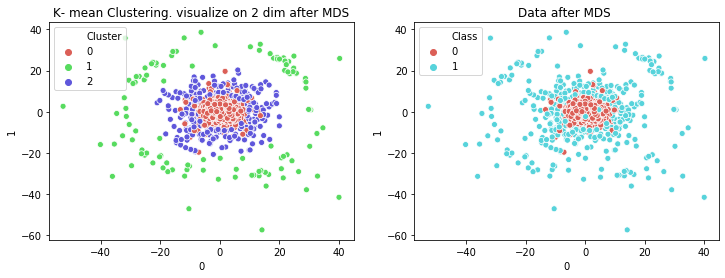

In [40]:
# we see that the scores give us 3 clusters

# run kmeans algorithm
kmeans_model = KMeans(n_clusters=3,n_jobs=-1)
kmeans_model.fit(X)

cluster = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_
Kmean_cluster = kmeans_model.predict(X)
# # perform PCA for plotting
# pca_model_3 = PCA(n_components=3)
# kmeans_pca_data = pca_model_3.fit_transform(X)

# plot 3D scatter
#plot_3d_scatter(kmeans_pca_data,Kmean_cluster)

# perform MDS for plotting
Kmean_mds_data = manifold.MDS(2, max_iter=10, n_init=1).fit_transform(X)
df_mds = pd.DataFrame(Kmean_mds_data)
df_mds["Cluster"]  = Kmean_cluster
df_mds["Class"] = y

#plot after MDS
fig, (ax1,ax2)  = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x=0,y=1,hue="Cluster",data=df_mds ,palette =sns.color_palette("hls",3),ax=ax1)
ax1.set_title("K- mean Clustering. visualize on 2 dim after MDS")

plt.sca(ax2)

sns.scatterplot(x=0,y=1,hue="Class",data=df_mds,palette =sns.color_palette("hls",2),ax=ax2)
ax2.set_title("Data after MDS ")


#KMean analyze clusters
Kmean_df = pd.DataFrame()
Kmean_df = X.copy()

Kmean_df['Cluster'] = pd.Series(Kmean_cluster)
Kmean_df['Class']  = y

Kmean_df.head()
pd.crosstab(Kmean_df['Cluster'],Kmean_df['Class'])

Homogeneity: 0.692
Completeness: 0.697
V-measure: 0.695
normalized mutual info: 0.695


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


p value for normalized mutual info-  0.0
silhouette score : 0.633


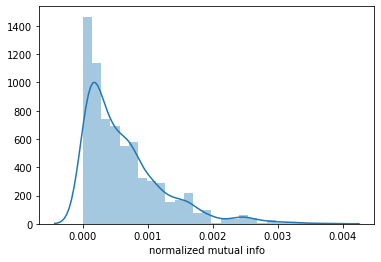

In [41]:
print_clustering_score(y, Kmean_cluster)
print_silouhette_score(X,Kmean_cluster)
#compute_mutual_info_p_value(y, Kmean_cluster)

K-means after PCA 

Homogeneity: 0.689
Completeness: 0.696
V-measure: 0.693
normalized mutual info: 0.693
p value for normalized mutual info-  0.0


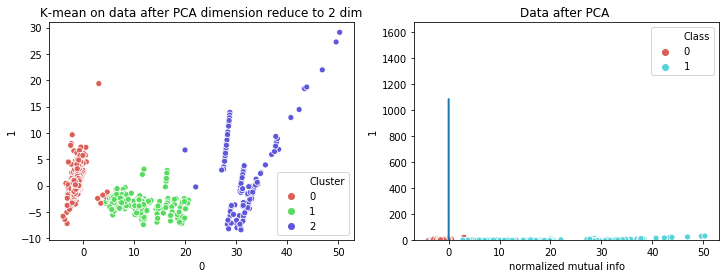

In [42]:
#K-MEAN AFTAR PCA
# perform PCA 2 dimensions for plotting
#model_pca_2 = PCA(n_components=2)
#data_pca = model_pca_2.fit_transform(X)
#pca_2_data_sample
#print(model_pca.components_)
df_pca = pd.DataFrame()
df_pca = pd.DataFrame(pca_2_data_sample)

#kmeans_model = KMeans(n_clusters=3,n_jobs=-1)
#kmeans_model.fit(df_pca)

#cluster = kmeans_model.labels_
#centroids = kmeans_model.cluster_centers_
#Kmean_cluster = kmeans_model.predict(df_pca)


##########################################
kmeans_model_pca = KMeans(n_clusters=3,n_jobs=-1).fit(df_pca.values)
kmeans_pca_cluster = kmeans_model_pca.predict(df_pca.values)

df_pca["Cluster"]  = kmeans_pca_cluster
df_pca["Class"] = y

pd.crosstab(df_pca['Cluster'],df_pca['Class'])
#################################################
fig, (ax1,ax2)  = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x=0,y=1,hue="Cluster",data=df_pca ,palette =sns.color_palette("hls",3),ax=ax1)
ax1.set_title("K-mean on data after PCA dimension reduce to 2 dim")

plt.sca(ax2)

sns.scatterplot(x=0,y=1,hue="Class",data=df_pca,palette =sns.color_palette("hls",2),ax=ax2)
ax2.set_title("Data after PCA ")
#df_pca.head()
pd.crosstab(df_pca['Cluster'],df_pca['Class'])

print_clustering_score(y, kmeans_pca_cluster)
#print_silouhette_score(X,kmeans_pca_cluster)

In [77]:
df_pca.head()

,0,1,Cluster,Class
0,-0.900359,0.587538,0,0
1,-1.298768,-0.057317,0,0
2,-1.518850,0.153029,0,0
3,-1.224769,0.190950,0,0
4,-0.625737,0.815622,0,0


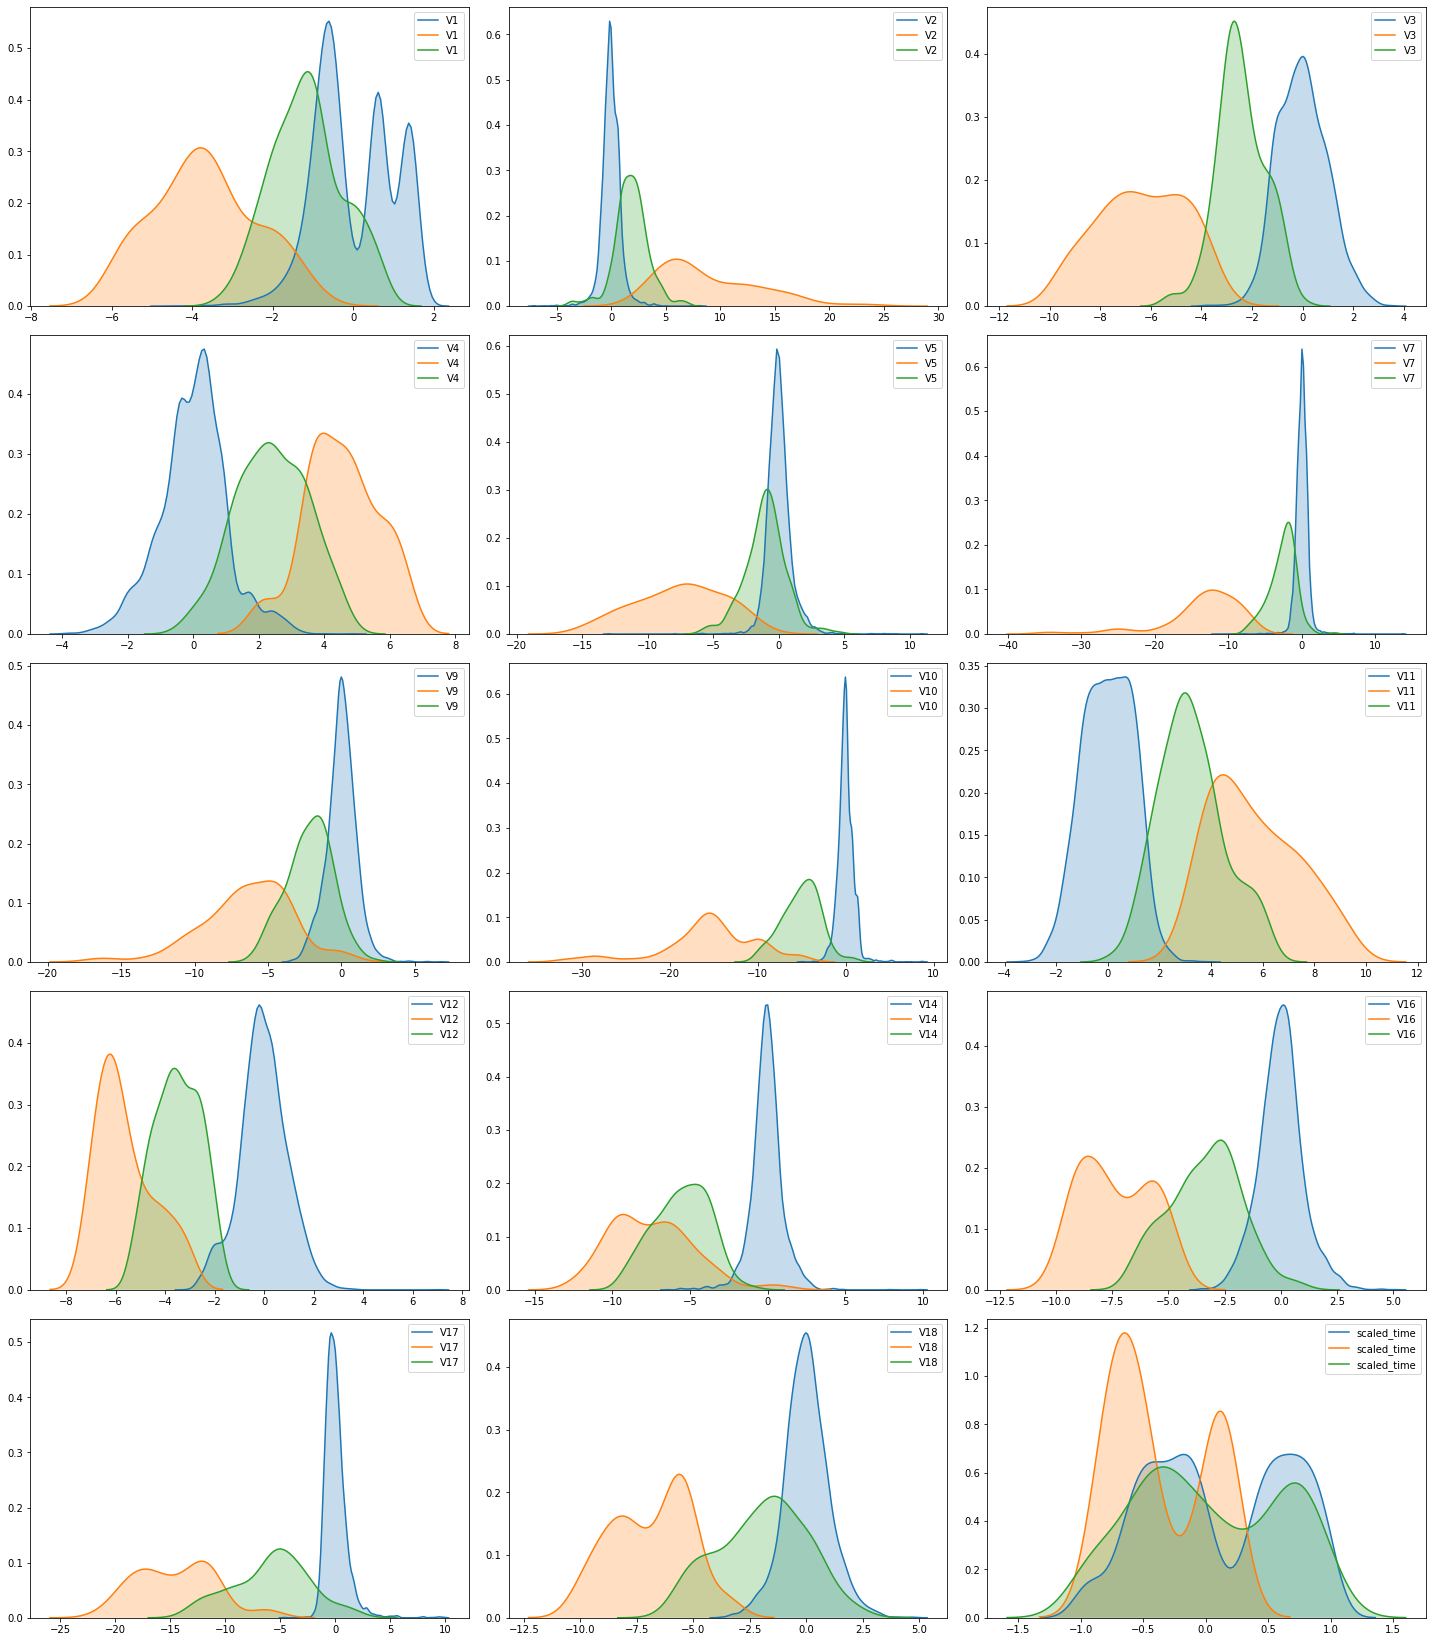

In [43]:
feature = pd.DataFrame()
feature = X.columns

cluster_0 = Kmean_df[Kmean_df['Cluster'] ==0]
cluster_1 = Kmean_df[Kmean_df['Cluster'] ==1]
cluster_2 = Kmean_df[Kmean_df['Cluster'] ==2]

plt.figure(figsize=(20,50))
i=1
for feat in feature:
    plt.subplot(11,3,i)
    sns.kdeplot(cluster_0[feat], shade= True)
    sns.kdeplot(cluster_1[feat], shade= True)
    sns.kdeplot(cluster_2[feat], shade= True)
    i=i+1
    plt.tight_layout()
    #plt.yscale('log')
plt.show()

Homogeneity: 0.689
Completeness: 0.696
V-measure: 0.693
normalized mutual info: 0.693
p value for normalized mutual info-  0.0
silhouette score : 0.633


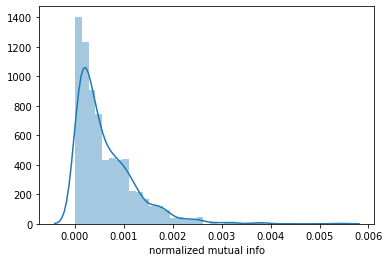

In [44]:
print_clustering_score(y, kmeans_pca_cluster)
print_silouhette_score(X,kmeans_pca_cluster)

Homogeneity: 0.689
Completeness: 0.696
V-measure: 0.693
normalized mutual info: 0.693
p value for normalized mutual info-  0.0


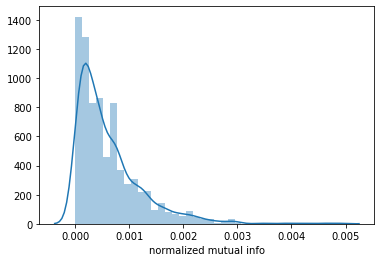

In [45]:
#best score because itharvut
print_clustering_score(y, kmeans_pca_cluster)

predict K mean model for all data

In [46]:
#X_all_data.head()

In [47]:
df= pd.DataFrame()

In [48]:
# Run Predict to all data with the model

#cluster_all_data = kmeans_model.labels_
Kmean_cluster = kmeans_model.predict(X_all_data)

# perform PCA for plotting
#pca_2_all_data = model_pca_2.fit_transform(X_all_data)
#MDS
#Kmean_mds_data = manifold.MDS(2, max_iter=10, n_init=1).fit_transform(X_all_data)
#df_mds = pd.DataFrame(Kmean_mds_data)
#df_mds["Cluster"]  = Kmean_cluster
#df_mds["Class"] = y_all_data
    
df=pd.DataFrame(pca_2_all_data)

df["Cluster"]  = Kmean_cluster
df["Class"] = y_all_data
#df.groupby(["Cluster"])["Class"].count()

pd.crosstab(df['Cluster'],df['Class'])

Class,0,1
Cluster,,
0,284244,103
1,27,114
2,44,275


Text(0.5, 1.0, 'Data after PCA ')

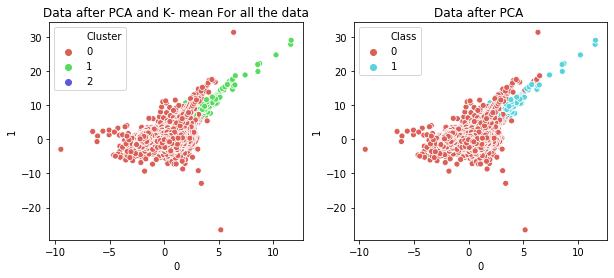

In [49]:
fig, (ax1,ax2)  = plt.subplots(1,2,figsize = (10,4))

sns.scatterplot(x=0,y=1,hue="Cluster",data=df ,palette =sns.color_palette("hls",3),ax=ax1)
ax1.set_title("Data after PCA and K- mean For all the data")
plt.sca(ax2)
sns.scatterplot(x=0,y=1,hue="Class",data=df,palette =sns.color_palette("hls",2),ax=ax2)
ax2.set_title("Data after PCA ")


Homogeneity: 0.692
Completeness: 0.677
V-measure: 0.684
normalized mutual info: 0.684
p value for normalized mutual info-  0.0


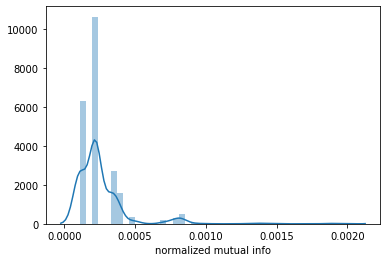

In [50]:
print_clustering_score(y_all_data, Kmean_cluster)
#print_silouhette_score(X_all_data,Kmean_cluster) --take too long time to compute

In [51]:
#y_all_data.shape

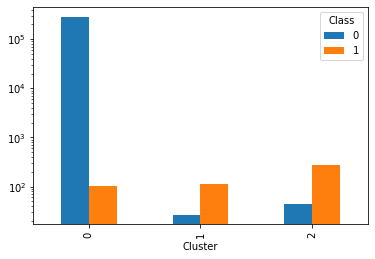

In [52]:
#pd.crosstab(Kmean_data_all['Cluster'],Kmean_data_all['Class']).plot(kind='bar')
pd.crosstab(df['Cluster'],df['Class']).plot(kind='bar')
plt.yscale('log')

# GMM

In [53]:
#check how many cluster to choose
silhouette_scores = {}
gm_aic = []
gm_bic= []
gm_bicP= []

for i in range(2,8):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X)
    gaussian_mixture_model_labels = gm.fit_predict(X)
    
    silhouette_score_val = silhouette_score(X,gaussian_mixture_model_labels)
    silhouette_scores.update({k:silhouette_score_val}) 
    
    gm_bic.append(-gm.bic(X))
    gm_bicP.append(gm.bic(X))
    gm_aic.append(gm.aic(X))
    
    print(f"key : {silhouette_scores.keys()}")
    print(f"value : {silhouette_scores.values()}")
    

key : dict_keys([8])
value : dict_values([0.4336031324179666])
key : dict_keys([8])
value : dict_values([0.06638803104906417])
key : dict_keys([8])
value : dict_values([0.0867810824555083])
key : dict_keys([8])
value : dict_values([0.03288687590823017])
key : dict_keys([8])
value : dict_values([0.05239899162259732])
key : dict_keys([8])
value : dict_values([0.0605748172687668])


In [54]:
print(gm_bicP)

[190722.12759907756, 165782.04752219087, 163180.26979872494, 150329.23771258988, 147444.82856447963, 145218.0421721272]


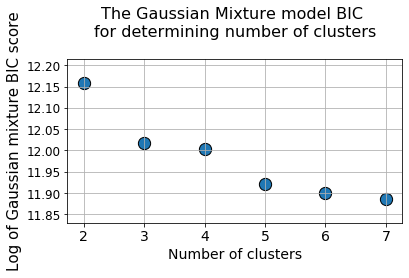

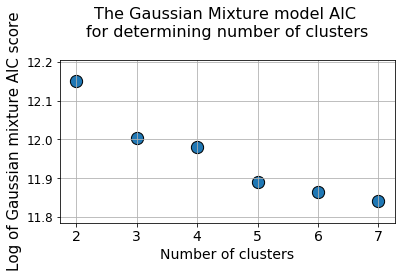

In [55]:
plt.figure(figsize=(6,3))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,8)],y=np.log(gm_bicP),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,8)],fontsize=14)
plt.yticks(fontsize=12)
plt.show()


plt.figure(figsize=(6,3))
plt.title("The Gaussian Mixture model AIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,8)],y=np.log(gm_aic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture AIC score",fontsize=15)
plt.xticks([i for i in range(2,8)],fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [56]:
df_gmm= pd.DataFrame()

gm_model = GaussianMixture(n_components=2).fit(X)
#fit_predict
gm_model_labels = gm_model.predict(X)

print()
# perform PCA for plotting
#pca_2_data_sample = model_pca_2.fit_transform(X)

df_gmm=pd.DataFrame(pca_2_data_sample)

df_gmm["Cluster"]  = gm_model_labels
df_gmm["Class"] = y
#df_gmm.head(3)
pd.crosstab(df_gmm["Cluster"],df_gmm['Class'])

Class,0,1
Cluster,,
0,4382,46
1,618,446


In [57]:
#df_gmm.groupby(["Cluster"])["Class"].count()


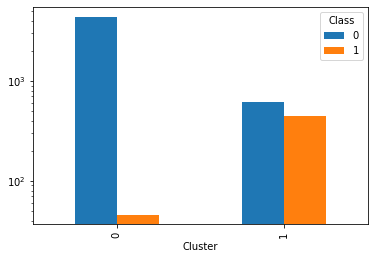

In [58]:

pd.crosstab(df_gmm["Cluster"],df_gmm['Class']).plot(kind='bar')
plt.yscale('log')

Text(0.5, 1.0, 'Data after PCA reduce to 2 Dim  ')

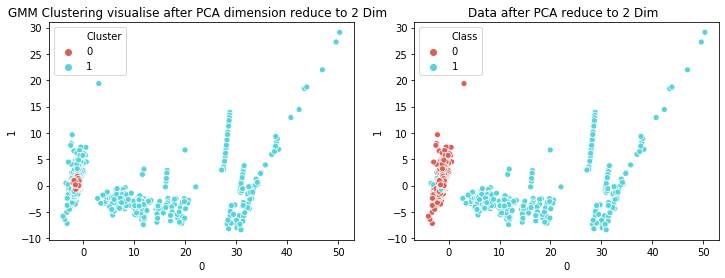

In [59]:
fig, (ax1,ax2)  = plt.subplots(1,2,figsize = (12,4))

sns.scatterplot(x=0,y=1,hue="Cluster",data=df_gmm ,palette =sns.color_palette("hls",2),ax=ax1)
ax1.set_title("GMM Clustering visualise after PCA dimension reduce to 2 Dim  ")

plt.sca(ax2)

sns.scatterplot(x=0,y=1,hue="Class",data=df_gmm,palette =sns.color_palette("hls",2),ax=ax2)
ax2.set_title("Data after PCA reduce to 2 Dim  ")

Homogeneity: 0.409
Completeness: 0.251
V-measure: 0.311
normalized mutual info: 0.320
p value for normalized mutual info-  0.0
silhouette score: 0.4336031324179666


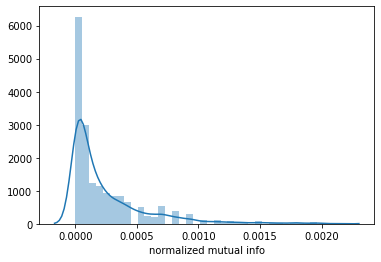

In [60]:
print_clustering_score(y,gm_model_labels)
silhouette_score_val = silhouette_score(X,gm_model_labels)
print("silhouette score:", silhouette_score_val)

GMM for all data

Text(0.5, 1.0, 'ALL Data after PCA dim reduce  ')

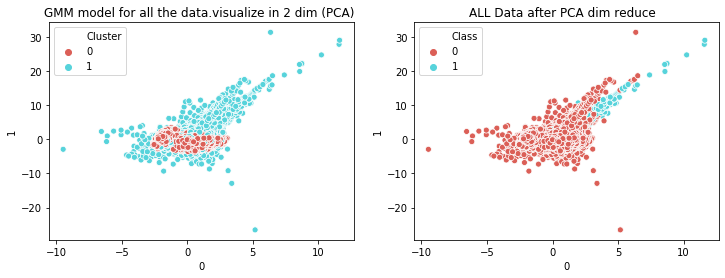

In [61]:
# Run Predict to all data with the GM model
#cluster_all_data = kmeans_model.labels_
GM_cluster = gm_model.predict(X_all_data)

# perform PCA for plotting
#gm_pca_data = model_pca_2.fit_transform(X_all_data)

df_gm_all=pd.DataFrame(pca_2_all_data)

df_gm_all["Cluster"]  = GM_cluster
df_gm_all["Class"] = y_all_data
pd.crosstab(df_gm_all["Cluster"],df_gm_all['Class'])

fig, (ax1,ax2)  = plt.subplots(1,2,figsize = (12,4))

sns.scatterplot(x=0,y=1,hue="Cluster",data=df_gm_all ,palette =sns.color_palette("hls",2),ax=ax1)
ax1.set_title("GMM model for all the data.visualize in 2 dim (PCA) ")
plt.sca(ax2)
sns.scatterplot(x=0,y=1,hue="Class",data=df_gm_all,palette =sns.color_palette("hls",2),ax=ax2)
ax2.set_title("ALL Data after PCA dim reduce  ")

In [62]:
#print(gm_model.covariances_)

Homogeneity: 0.209
Completeness: 0.007
V-measure: 0.013
normalized mutual info: 0.038
p value for normalized mutual info-  0.0


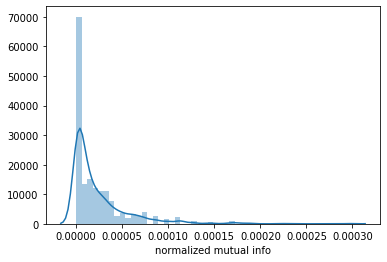

In [63]:
print_clustering_score(y_all_data,GM_cluster)
#print_silouhette_score(X_all_data,GM_cluster) --took long time

# Agglomerative_model

In [64]:

elbow_scores = {}
silhouette_scores = {}

for k in range(2,6):
    #print(k)
    knn = kneighbors_graph(X,10,n_jobs=-1)
    Agglomerative_model = AgglomerativeClustering(n_clusters=k,connectivity=knn)
    Agglomerative_model.fit(X.values)
    silhouette_score_val = silhouette_score(X,Agglomerative_model.labels_)
    silhouette_scores.update({k:silhouette_score_val})
    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


[]

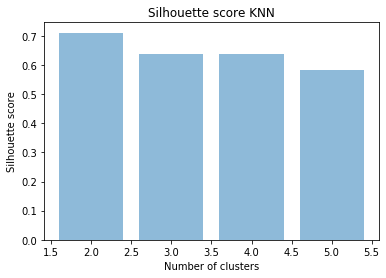

In [65]:
plt.bar(list(silhouette_scores.keys()),list(silhouette_scores.values()),align='center', alpha=0.5)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title('Silhouette score KNN')
plt.plot()


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


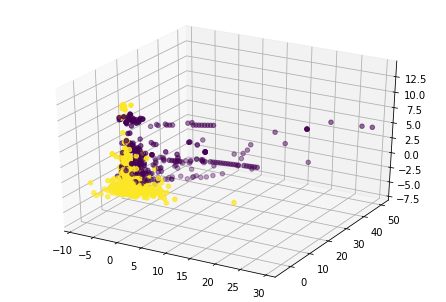

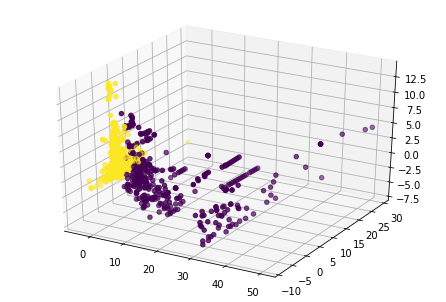

In [66]:
knn = kneighbors_graph(X,10,n_jobs=-1)
Agglomerative_model = AgglomerativeClustering(n_clusters=2,connectivity=knn)
Agglomerative_model.fit(X)
agg_predict = Agglomerative_model.labels_

# perform PCA for plotting
agglomerative_pca = PCA(n_components=3)
agglomerative_pca_data = agglomerative_pca.fit_transform(X)
# plot 3D scatter
plot_3d_scatter(agglomerative_pca_data,Agglomerative_model.labels_)

Text(0.5, 1.0, 'ALL Data after PCA dim reduce  ')

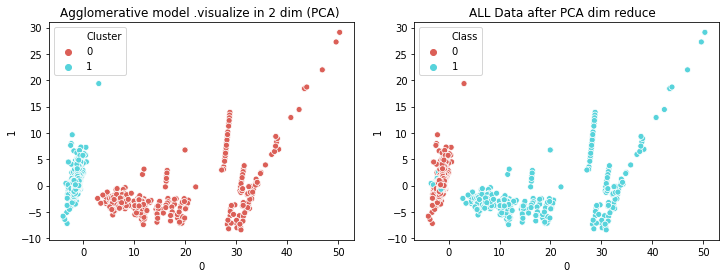

In [67]:
df_agg = pd.DataFrame(pca_2_data_sample)

df_agg['Cluster'] = pd.Series(agg_predict)
df_agg['Class']  = y
#agg_data.head()
pd.crosstab(df_agg["Cluster"],df_agg['Class'])


fig, (ax1,ax2)  = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x=0,y=1,hue="Cluster",data=df_agg ,palette =sns.color_palette("hls",2),ax=ax1)
ax1.set_title("Agglomerative model .visualize in 2 dim (PCA) ")
plt.sca(ax2)
sns.scatterplot(x=0,y=1,hue="Class",data=df_agg,palette =sns.color_palette("hls",2),ax=ax2)
ax2.set_title("ALL Data after PCA dim reduce  ")


In [68]:
pd.crosstab(df_agg["Cluster"],df_agg['Class'])

Class,0,1
Cluster,,
0,1,394
1,4999,98


Homogeneity: 0.703
Completeness: 0.820
V-measure: 0.757
normalized mutual info: 0.760
p value for normalized mutual info-  0.0
silhouette score : 0.710


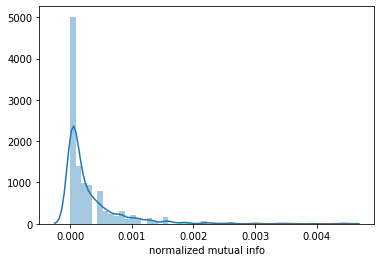

In [69]:
print_clustering_score(y,agg_predict)
print_silouhette_score(X,agg_predict) 

Run AGG To All data

In [70]:
# Run Predict to all data with the model
knn = kneighbors_graph(X_all_data,10,n_jobs=-1)
Agglomerative_model = AgglomerativeClustering(n_clusters=2,connectivity=knn)
Agglomerative_model.fit(X_all_data)
#agg_predict = Agglomerative_model.labels_
agg_cluster = Agglomerative_model.fit_predict(X_all_data)

df_agg_all_data =pd.DataFrame(pca_2_all_data)
df_agg_all_data["Cluster"]  = agg_cluster
df_agg_all_data["Class"] = y_all_data

pd.crosstab(df_agg_all_data["Cluster"],df_agg_all_data['Class'])


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 7 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 7 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


Class,0,1
Cluster,,
0,249852,491
1,34463,1


Text(0.5, 1.0, 'ALL Data after PCA dim reduce  ')

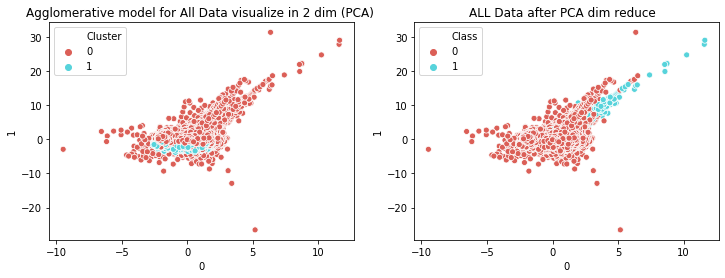

In [71]:
fig, (ax1,ax2)  = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x=0,y=1,hue="Cluster",data=df_agg_all_data ,palette =sns.color_palette("hls",2),ax=ax1)
ax1.set_title("Agglomerative model for All Data visualize in 2 dim (PCA) ")
plt.sca(ax2)
sns.scatterplot(x=0,y=1,hue="Class",data=df_agg_all_data,palette =sns.color_palette("hls",2),ax=ax2)
ax2.set_title("ALL Data after PCA dim reduce  ")

In [72]:
pd.crosstab(df_agg_all_data["Cluster"],df_agg_all_data['Class'])

Class,0,1
Cluster,,
0,249852,491
1,34463,1


score AGG model run to all data
Homogeneity: 0.016
Completeness: 0.001
V-measure: 0.001
normalized mutual info: 0.003
p value for normalized mutual info-  0.0


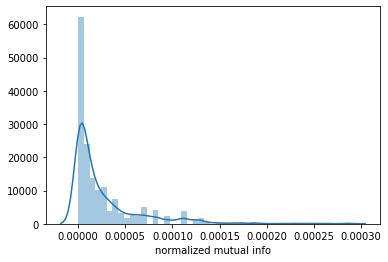

In [73]:
print("score AGG model run to all data")
print_clustering_score(y_all_data,agg_cluster)
#print_silouhette_score(X_all_data,agg_cluster) 

In [74]:
#pd_data_pca.head()

feature distribution in each cluster (after PCA)

In [75]:
print("Au revoir :)")

Au revoir :)
